**Tarif Engine**

Classes

TarEng

Demogr

Economics

Tariff

**General Parameters (configurable via bDefaultsInput)**

t0: currrent year (default - current year)

g: gender (0 - man; 1 - woman - default 0)

x: current age

b: start age of benefits (default b=x)

s: end age benefits (default - omega)

Other Defaults: ATar, QxCH, iTech

**GTar**

Inputs:

fB: Death Benefit Level

fM: Maturity Benefit

**ATar**

Inputs:

fR: Annuity Benefit Start

fDeltaR: Linear increase relative to fR

iNrIncreases: Nr of Benefit Increases




 **Read Me**

The library TarLib aims to provide all necessary functionality to calculate cash flows and mathematical reserves for  a variety of life insurance products, in particular capital insurance on one life and annuities on one and two lives.
The whole librariy is written in a abstract way such that it is easy to amend it for other types of prodcuts.

The library consists of the following classes:

- **TarEng** This is the top class and the main aim is to Dispatch the requests to the respective modules and to provide the resuylts in a structured way. The inputs are provided via the function ParseTask, where a semicolon reparated string is given and processed and the input being written on self->pInp and the output to self->pOut. For the documentation of the member variables see the constructor. Remark, that all Input and Output is encapsulated in the MyIO Class.
- **MyIo** This is an abstraction of input and output including reset and printing itself
- **Markov** Markov Life Insurance Class for implementation of actual Tariffs
- **ATar** One Life Annuity. Output Reserves and Cash Flows; uses classical approach
- **A2Tar** Ditto 2 life Annuity; uses Markov Class
- **GTar** Ditto Capital Insurance; uses classical approach

**Implemented Tariffs/Demoraphics and Economies**

 self.symDirTariffs = {"A":ATar,"A2":A2Tar,"G":GTar,"A..":ATar,"AR.":ATar,"A.E":ATar,"ARE":ATar,"A.L":ATar,"ARL":ATar,"ART":ATar,"G..":GTar,"F..":GTar,"T..":GTar,"L..":GTar,"W..":A2Tar}

self.symDirDemogr = {"CH":QxCH}

self.symDirEco ={"iTech":ITech}

**Parameters ATar**

- **Gender 0/1** self.gender = int(self.psymParent.pInp.Param["g"])
- **Current Age** self.x = int(self.psymParent.pInp.Param["x"])
- **Start Age Benefit Payment** self.b = int(self.psymParent.pInp.Param["b"])
- **End Age Benefit Payment+1** self.s = int(self.psymParent.pInp.Param["s"])
- **Benefit Level** self.fLevel = float(self.psymParent.pInp.Param["fLevel"])
- **Payments p.a.** self.m = int(self.psymParent.pInp.Param["m"])
- Tokens=["iNrIncreases","alpha","fR","iExp"]: **See Implementation** fR level Annuity

**Parameters GTar**
- **Gender 0/1** self.gender = int(self.psymParent.pInp.Param["g"])
- **Current Age** self.x = int(self.psymParent.pInp.Param["x"])
- **Start Age Benefit Payment** self.b = int(self.psymParent.pInp.Param["b"])
- **End Age Benefit Payment+1** self.s = int(self.psymParent.pInp.Param["s"])
- **Benefit Level** self.fLevel = float(self.psymParent.pInp.Param["fLevel"])
- **Maturity Benefit at age s** self.gender = int(self.psymParent.pInp.Param["fM"])
- **Death Benefit between b and s** self.gender = int(self.psymParent.pInp.Param["fB"])

**Parameters A2Tar**

Same as per above mutatis mutandis. Some notes: the ages are in respect to the age of person number one and all Benefits indicated "1" (and "2" respectively refer to the state where the indicated person is alive and the partner death. The symbol "12" referrs to both alive and dead(jopint life status). Note the age of person "2" in respect to person "1" is given by deltaxy with $\Delta_{xy} = y - x$

- self.x = int(self.psymParent.pInp.Param["x"])
- self.s = int(self.psymParent.pInp.Param["s"])
- self.b = int(self.psymParent.pInp.Param["b"])
- self.m = int(self.psymParent.pInp.Param["m"])
- self.fLevel = float(self.psymParent.pInp.Param["fLevel"])
- self.gender1 = int(self.psymParent.pInp.Param["g"])
- self.gender2 = int(self.psymParent.pInp.Param["g2"])
- self.deltaxy = int(self.psymParent.pInp.Param["deltaxy"])
- Tokens=["fM12","fM1","fM2","fR1","fR2","fR12","fB1","fB2","fB12"]

Examples

**Whole of life staring age 20 dfault interest Rate**
    a = TarEng()
    
    a.ParseTask("G;iTech;g=0;x=20;s=110;fB=0;fM=1000000")
    
    a.vPlot()


**Deferred Annuity**


Current Age 55, start payout 60, end payment at 89, Annuity of 12000

    strTask = "A;iTech;g=0;x=55;b=60;s=90;fR=12000"
    
    a.ParseTask(strTask)
    
    a.vPlot()

**Widows pension 12000 with woman 3 years younger**

    strTask = "A2;iTech;g=0;g2=1;deltaxy=3;x=20;s=120;fR2=12000"
    
    a.ParseTask(strTask)
    
    a.vPlot()


Example Output See below
 

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import datetime
import matplotlib


bExaMode = True

class MyIO:
    def __init__(self, strName):
        self.me = strName

    def getvariablenames(self):
        members = [attr for attr in dir(self) if not \
                 callable(getattr(self, attr)) and not attr.startswith("__")] 
        return(members)
    
    def clean(self):
        strName = self.me
        members = self.getvariablenames()
        for i in members: 
            strTask = "self."+i+"= None"
            exec(strTask)
        self.me = strName
    
    def print(self):
        instance_vars = vars(self)
        for v_name, v_value in instance_vars.items():
            print("%s --> %s"%(repr(v_name),repr(v_value)))

    def vstrPrint(self):
        instance_vars = vars(self)
        strOut = "Trace %s \n------------ \n"%(self.me)
        for v_name, v_value in instance_vars.items():
            strOut+= "%s --> %s \n"%(repr(v_name),repr(v_value))
        strOut +="------------ \n"
        return(strOut)
    
class TarEng():
    
    def __init__(self,i=0.025, t0= 2025, omega=120,nCF=100,bDefaultsInput = True,bLevel=False,bBatch=False,bTrace=True):
        self.strVersion = "Tariff Engine V0.50 M Koller"
        # Tarif dictory stringName:ClassReference. All available Tarif Routines
        self.symDirTariffs = dict() 
        # Demographics dictory stringName:ClassReference. All available MOrtality Rates
        # Currently only one Qx Table
        self.symDirDemogr = dict()
        # Economics dictory stringName:ClassReference. All available Economics
        self.symDirEco = dict()
        # Input Class
        self.pInp = MyIO("Input")
        # Output Class
        self.pOut = MyIO("Output")
        # Trace Class
        self.pTrace = MyIO("Trace")
        # What now follows are Global Parameter Class and initialisation
        self.pGPar = MyIO("GlobalParameter")
        self.pGPar.iTech = i # Technical Interest Ratse
        self.pGPar.vTech = 1./(1.+i) # Corresponding Discount
        self.pGPar.t0 = t0 # Start Year for generational table
        self.pGPar.omega=omega # Latest Age Omega
        self.pGPar.nCF=nCF # Number of Cash FLows to be calculated
        # Here we add all available Traif Modules to self.symDirTariffs
        self.AddModules()
        # Default Behavior and resetting I/O
        self.bDefaultsInput = bDefaultsInput
        self.pInp.Tarif = None
        self.pInp.Econ = None
        self.pInp.Demo = None
        self.bLevel = bLevel
        self.bBatch = bBatch
        self.bTrace = bTrace
        self.pInp.Param = dict()
        self.pInp.Param["fI"] = i
        if bTrace:
            self.psymTrace = open("trace.txt","w")
        

    def AddModules(self):
        self.symDirTariffs = {"A":ATar,"A2":A2Tar,"G":GTar,\
                              "A..":ATar,"AR.":ATar,"A.E":ATar,"ARE":ATar,"A.L":ATar,"ARL":ATar,\
                              "ART":ATar,"G..":GTar,"F..":GTar,\
                              "T..":GTar,"L..":GTar,"W..":A2Tar,"I":ITar,"IR.":ITar,"I..":ITar,\
                             "MCAG":A_G_TarMarkov}
        self.symDirDemogr = {"CH":QxCH}
        self.symDirEco ={"iTech":ITech}
        
    def vPostProcess(self):
        Mapper={"A..":self.AMod,"AR.":self.AMod,"A.E":self.AMod,"ARE":self.AMod, "A.L":self.AMod,"ARL":self.AMod,\
                "ART":self.AMod,"G..":self.GMod,"F..":self.GMod,\
                "T..":self.GMod,"L..":self.GMod,"W..":self.WMod,"IR.":self.IMod,"I..":self.IMod}
        if self.pInp.Tarif in Mapper.keys():
            Mapper[self.pInp.Tarif]()
        return()

    def AMod(self):
        if self.pInp.Tarif == "AR." or self.pInp.Tarif == "A.." or self.pInp.Tarif == "ART":
            self.pInp.Param["alpha"] = 0.
            self.pInp.Param["iNrIncreases"] = 0
            self.pInp.Param["iExp"] = 0
        if self.pInp.Tarif == "AR." or self.pInp.Tarif == "ARE" or self.pInp.Tarif == "ARL" or self.pInp.Tarif == "ART":
            self.pInp.Param["b"] = self.pInp.Param["x"]
        if self.pInp.Tarif == "ARL" or self.pInp.Tarif == "A.L":
            self.pInp.Param["iExp"] = 0
            self.pInp.Param["iNrIncreases"] = 1000
        if self.pInp.Tarif == "ARE" or self.pInp.Tarif == "A.E":
            self.pInp.Param["iExp"] = 1
            self.pInp.Param["iNrIncreases"] = 1000
        if self.pInp.Tarif != "ART":
               self.pInp.Param["s"] = self.pGPar.omega
        self.pInp.Param["fR"] = 1

    def GMod(self):
        self.pInp.Param["b"] = self.pInp.Param["x"]
        if self.pInp.Tarif == "G..":
            self.pInp.Param["fM"] = 1
            self.pInp.Param["fB"] = 1 
        if self.pInp.Tarif == "L..":
            self.pInp.Param["fM"] = 1
            self.pInp.Param["fB"] = 1 
            self.pInp.Param["s"] = self.pGPar.omega
        if self.pInp.Tarif == "T..":
            self.pInp.Param["fM"] = 0
            self.pInp.Param["fB"] = 1 
        if self.pInp.Tarif == "F..":
            self.pInp.Param["fM"] = 1
            self.pInp.Param["fB"] = 0 


    def IMod(self):
        if self.pInp.Tarif == "IR." or self.pInp.Tarif == "I..":
            self.pInp.Param["alpha"] = 0.
            self.pInp.Param["iNrIncreases"] = 0
            self.pInp.Param["iExp"] = 0
        if self.pInp.Tarif == "IR.":
            self.pInp.Param["b"] = self.pInp.Param["x"]
            self.pInp.Param["iState"] = 1
        if self.pInp.Tarif == "I..":
            self.pInp.Param["iState"] = 0
        self.pInp.Param["fR1"] = 0
        self.pInp.Param["fR2"] = 1.

 
    def WMod(self):
        self.pInp.Param["s"] = self.pGPar.omega
        self.pInp.Param["b"] = self.pInp.Param["x"]
        Tokens=["fM12","fM1","fM2","fR1","fR12","fB1","fB2","fB12"]
        for i in Tokens:
            self.pInp.Param[i] = 0
        self.pInp.Param["fR2"] = 1
        self.pInp.Param["g2"] = 1-int(self.pInp.Param["g"])
            
    
    def ParseTask(self, strInput,strSep=";",bPrintOut=True):
        if self.bBatch: bPrintOut=False
        if strInput =="clear":
            self.vClearInput(bTrace=False)
        else:
            self.ParseTask2(strInput,strSep=strSep,bPrintOut=bPrintOut)
    
    def ParseTask2(self, strInput,strSep=";",bPrintOut=True):    
        #print(self.pInp.Tarif)
        #strInput = self.vPreProcess(strInput)
        Tokens=strInput.split(strSep)
        
        self.pInp.strInp = strInput
        #print(self.pInp.Tarif)
        for i in Tokens:
            #print(self.pInp.Tarif)
            SubTok = i.split("=")
            if len(SubTok) == 1:
                if SubTok[0] in self.symDirTariffs.keys():
                    self.pInp.Tarif = SubTok[0]
                    self.pInp.Param["Tariff"] = SubTok[0]
                if SubTok[0] in self.symDirDemogr.keys():
                    self.pInp.Demo = SubTok[0]
                    self.pInp.Param["Demo"] = SubTok[0]
                if SubTok[0] in self.symDirEco.keys():
                    self.pInp.Econ = SubTok[0]
                    self.pInp.Param["Eco"] = SubTok[0]
            else:
                self.pInp.Param[SubTok[0]] = SubTok[1]
        #print(self.pInp.Tarif)
        if self.bDefaultsInput:
            #if self.pInp.Tarif == None:
            #    self.pInp.Tarif = "A"
            if self.pInp.Demo == None:
                self.pInp.Demo = "CH"
            if self.pInp.Econ == None:
                self.pInp.Econ = "iTech"
            self.vDefaultMapper()

       
       # init objects
        self.psymE = self.symDirEco[self.pInp.Econ](self)
        self.psymD = self.symDirDemogr[self.pInp.Demo](self)
        self.psymT = self.symDirTariffs[self.pInp.Tarif](self)

        self.vPostProcess()
        
      # do Stuff
        if not self.bLevel:
            self.pInp.Param["fLevel"] = 1.
        #else:
        #    print("Task:",strInput)
        #    print(repr(self.pInp.Param))

        self.psymE.vDoCalc()
        self.psymD.vDoCalc()
        self.psymT.vDoCalc()

      # print
        if bPrintOut: self.vPrint()
        if self.bTrace: self.TraceIO()
            

    def vDefaultMapper(self):
        strOut = ""
        today = datetime.date.today()
        self.pGPar.t0 = today.year
        dDefaults={"x":15,"g":0,"g2":1,"deltaxy":-3,"fM":1,"fB":1}
        for i in dDefaults.keys():
            if i not in self.pInp.Param.keys():
                self.pInp.Param[i] = dDefaults[i]
        strOut +="Set year to:"+str(self.pGPar.t0)+"\n"
        if "b" not in self.pInp.Param.keys():
            self.pInp.Param["b"] = self.pInp.Param["x"]
            strOut +="Overrule b (missing) \n"
        if "s" not in self.pInp.Param.keys():
            self.pInp.Param["s"] = self.pGPar.omega
            strOut +="Overrule s (missing) \n"
        
        self.pTrace.vDefaultMapperMsg  = strOut
        
    def strPrint(self):
        strStruct2a = "%7s: %20s %20s \n"
        strSep= (len(strStruct2a %("Age","DK/MR","E[CF]"))-1)*"-"+"\n"
        strParam = ["g","g2","x","deltaxy","b","s"]
        strOut = ""
        strOut += strSep
        strOut += self.pInp.Tarif +"\n"
        strOut += strSep
        strStruct1 = "%-15s: %10s \n"
        strStruct2 = "%7d: %20.6f %20.6f \n"
        
        strOut += strStruct1 %("omega",str(self.pGPar.omega))
        strOut += strStruct1 %("t0",str(self.pGPar.t0))
        strOut += strStruct1 %("iTech",str(self.pGPar.iTech))
        for i in strParam:
            bAvailable = (i in self.pInp.Param.keys())
            if bAvailable:
                strOut += strStruct1 %(i,str(self.pInp.Param[i]))
            else:
                strOut += strStruct1 %(i,"n/a")
        for i in self.pInp.Param.keys():
            bDone = (i in strParam)
            if not bDone:
                 strOut += strStruct1 %(i,str(self.pInp.Param[i]))
                
        strOut += strSep
        x= int(self.pInp.Param["x"])
        s= int(self.pInp.Param["s"])
        strOut += strStruct2a %("Age","DK/MR","E[CF]")
        strOut += strSep
        for i in range(x,min(self.pGPar.omega,s+1)):
            strOut += strStruct2 %(i,self.pOut.dDK[i],self.pOut.dCF[i-x])
        return(strOut)

    def vPrint(self):
        print(self.strPrint())
            
    def vPlot(self):
        x=int(self.pInp.Param["x"])
        periods = self.pGPar.nCF
        omega=self.pGPar.omega
        xmax = min(omega,x+periods)
        fig = plt.figure(1)
        plt.plot(range(x,xmax),self.pOut.dDK[x:xmax])
        plt.grid(True)
        fig2=plt.figure(2)
        plt.plot(range(0,xmax-x),self.pOut.dCF[0:xmax-x])
        plt.grid(True)
        plt.show()
        
    def psymPlot(self):
        x=int(self.pInp.Param["x"])
        periods = self.pGPar.nCF
        omega=self.pGPar.omega
        xmax = min(omega,x+periods)
        fig, ax = plt.subplots()#figure(1)
        ax.plot(range(x,xmax),self.pOut.dDK[x:xmax])
        ax.grid(True)
        return(fig)
         
    def TraceIO(self):
        strOut = ""
        for i in [self.pInp,self.pOut,self.pTrace,self.pGPar]:
            strOut += i.vstrPrint()
        self.psymTrace.write("\n ****************************** \n") 
        self.psymTrace.write(strOut)
        #print(strOut)

    def vClearInput(self,bTrace=True):
        self.pInp.clean()
        self.pOut.clean()
        self.pTrace.clean()
        self.pInp.Tarif = None
        self.pInp.Econ = None
        self.pInp.Demo = None
        self.pInp.Param = dict()
        if bTrace: self.TraceIO()
        
        

In [6]:
class Markov:
    def __init__(self):
        self.iNrStates = None
        self.iMaxTime  = None    
        self.dPij = [] # for each time a matrix ie dPij[k] matrix at time k
        self.dPre = [] # Vector vector of annuities at time t
        self.dPost= []
        self.dv   = []
        # Outputs
        self.dDK  = []
        self.dDKDistr  = []
        self.dCF  = []
        self.bCalculated = False
        self.bCFCalculated = False
        self.bCalculatedDistr = False
        self.iStart = None
        self.iStop  = None
        self.fDistrLow = -1000
        self.fDistrHigh = 150000
        self.iNrBuckets = 10000
        self.fBucketWidth = (self.fDistrHigh-self.fDistrLow)/self.iNrBuckets
        self.fBucketWidthRound = self.fBucketWidth / 2.
                
    def vDefineModel(self,iNrStates,iMaxTime=1200):
        self.iNrStates = iNrStates
        self.iMaxTime = iMaxTime
        for i in range(iMaxTime):
            tempPij = np.zeros([iNrStates,iNrStates])
            tempPost = np.zeros([iNrStates,iNrStates])
            tempPre = np.zeros([iNrStates])
            tempDK = np.zeros([iNrStates])
            tempCF = np.zeros([iNrStates])
            self.dPij.append(tempPij)
            self.dPost.append(tempPost)
            self.dPre.append(tempPre)
            self.dDK.append(tempDK)
            self.dCF.append(tempCF)  
        tempv = np.zeros([iMaxTime])
        self.dv=tempv

    def strTraceMTime(self,i):
        strOut = "Recursion from %d to %d \n =================== \n"%(i,i+1)
        dV = self.dv[i]
        dIRate = 1./dV - 1.
        strOut +="Discount of Period %12.6f (iRate %12.6f) \n"%(dV,dIRate)
        strOut += "Start Reserves: \n"
        for j in range(self.iNrStates):
            strOut += " t %4d State %4d: V = %12.6f \n"%(i+1,j,self.dDK[i+1][j])
        strOut += "Pij: \n"
        for j in range(self.iNrStates):
            dSum = 0
            for k in range(self.iNrStates):
                dPart = self.dPij[i][j,k]
                dSum += dPart
                dPost = self.dPost[i][j,k]
                strOut += "%4d --> %4d Pij = %12.6f (%12.6f)  (Post %12.6f)\n"%(j,k,dPart,dSum, dPost)
            strOut +="------------ \n"
        strOut += "End Reserves: \n" 
        for j in range(self.iNrStates):
            dPre = self.dPre[i][j]
            strOut += " t %4d State %4d: V = %12.6f (Pre %12.6f)\n"%(i,j,self.dDK[i][j],dPre)
        return(strOut)
        
    def strTraceM(self):
        strOut =""
        for i in range(self.iStart-1, self.iStop-1,-1):
            strOut += self.strTraceMTime(i)
        return(strOut)
             
        
    def iBucketNr(self, fValue):
        if fValue < self.fDistrLow:
            return(0)
        iBNR = (int(min(self.iNrBuckets-1,(fValue-self.fDistrLow)/self.fBucketWidth+self.fBucketWidthRound)))
        return(iBNR)
    
    def fValueOfBucket(self, iBucket):
        return(self.fBucketWidth*min(self.iNrBuckets-1,iBucket)+self.fDistrLow)
    
    def vCreateDistModel(self):
        print("You Know that you can call me only once everything is done")
        for i in range(self.iMaxTime):
            tempDK = np.zeros([self.iNrStates,self.iNrBuckets])
            self.dDKDistr.append(tempDK)
    
    def vSetDiscounT(self,fIRate):# you set v
        vTemp = 1./(1.+fIRate)
        for i in range(self.iMaxTime):
            self.dv[i] = vTemp
        self.bCalculated = False
        self.bCFCalculated = False

    def vSetDiscountYield(self,t, fIRate):# you set v
        vTemp = 1./(1.+fIRate)
        self.dv[t] = vTemp
        self.bCalculated = False
        self.bCFCalculated = False
    
    def vSetPij(self,t,i,j,fValue):# you set p_{ij}(t,t+1)
        self.dPij[t][i,j] = fValue
        self.bCalculated = False
        self.bCFCalculated = False
    
    def vSetPre(self,t,i,j,fValue):# you set a_{i}^{pre}(t) 
        self.dPre[t][i] = fValue
        self.bCalculated = False
        self.bCFCalculated = False
    
    def vSetPost(self,t,i,j,fValue):# you set a_{ij}^{post}(t)
        self.dPost[t][i,j] = fValue
        self.bCalculated = False
        self.bCFCalculated = False

    def doComplementStates(self,default=None, eps = 0.0001):
        iState = self.iNrStates -1
        if default != None:
            iState = default
        for i in range(self.iNrStates):
            bFound = False
            for t in range(self.iStop,self.iStart):
                fTot = sum(self.dPij[t][i,:])
                #print(i,t,"-->",fTot)
                if abs(fTot-1.) >= eps:
                    bFound=True
                    self.dPij[t][i,default] += 1. - fTot
            if bFound:
                print("Check P(Omega) = 1 failed for iState=",i,"Target State",iState)

    def doCalculateDK(self,iStart,iStop,iAge,iState):
        self.iStop = iStop
        self.iStart = iStart
        self.bCalculated = True
        for i in range(self.iMaxTime):
            self.dDK[i] *= 0.
        
        for i in range(self.iStart-1, self.iStop-1,-1):
            #print("Calc Time", i)
            for j in range(self.iNrStates):
                self.dDK[i][j] = self.dPre[i][j]
                for k in range(self.iNrStates):
                    self.dDK[i][j] += self.dv[i]*self.dPij[i][j,k]*(self.dPost[i][j,k]+self.dDK[i+1][k])

    def doCalculateCF(self,iStart,iStop,iAge,iState,bTrace=False):
        self.iStop = iStop
        self.iStart = iStart
        self.bCFCalculated = True
        for i in range(self.iMaxTime):
            self.dCF[i] *= 0.
        
        CurrentP = np.asmatrix(np.identity(self.iNrStates))
        if bTrace:
            print("----- ----- ----- ----- ")
        for i in range(self.iStop, self.iStart):
            if bTrace:
                print("----- ----- ----- ----- ")
                print(" Time ", i)
                print("CF BoP", self.dCF[i])
            for k in range(self.iNrStates):
                for l in range(self.iNrStates):
                    self.dCF[i][k] += CurrentP[k,l] * self.dPre[i][l]
            if bTrace:
                print("CF BoP after Pre", self.dCF[i])
            NextP = np.asmatrix(self.dPij[i])
            if bTrace:
                print("+++++ +++++ +++++ ")
                print("CurrentP\n", CurrentP) 
                print("+++++ +++++ +++++ ")
                print("Next P\n", NextP) 
                print("+++++ +++++ +++++ ")
                
            for k in range(self.iNrStates):
                for l in range(self.iNrStates):
                    for m in range(self.iNrStates):
                        self.dCF[i+1][k] += CurrentP[k,l] * NextP[l,m] * self.dPost[i][l,m]
            if bTrace:
                print("CF EoP t", self.dCF[i])
                print("CF EoP t+1", self.dCF[i+1])
            
            CurrentP = CurrentP * NextP # This is Chapman Kolmogorov
            if bTrace:
                print("+++++ +++++ +++++ ")
                print("CurrentP EoP\n", CurrentP) 
                print("+++++ +++++ +++++ ")

    def doCalculateDKDistr(self,iStart,iStop,iAge,iState,default=None):
        self.iStop = iStop
        self.iStart = iStart
        self.bCalculatedDistr = True
        self.vCreateDistModel()
        print("default is",str(default))
        self.doComplementStates(default=default)
        for i in range(self.iMaxTime):
            self.dDKDistr[i] *= 0.
        # Set Boundary Conditions
        iIndexSwitch = self.iBucketNr(0)
        for j in range(self.iNrStates):
            value = 0.
            for l in range(self.iNrBuckets):
                if l > iIndexSwitch:
                           value = 1.
                self.dDKDistr[self.iStart][j,l] = value
        # Calculation                   
        for i in range(self.iStart-1, self.iStop-1,-1):
            print("Dirst DK Calc Time", i)
            for j in range(self.iNrStates):
                for k in range(self.iNrStates):
                    for l in range(self.iNrBuckets):
                        dNewXTPlusOne = (self.fValueOfBucket(l) - self.dPre[i][j])/self.dv[i] - self.dPost[i][j,k]
                        self.dDKDistr[i][j,l] += self.dPij[i][j,k]*(self.dDKDistr[i+1][k,self.iBucketNr(dNewXTPlusOne)])
                                      
    
    def dGetDK(self,iStart,iStop,iAge,iState):
        if (iStart != self.iStart or iStop != self.iStop or not(self.bCalculated)):
            self.doCalculateDK(iStart,iStop,iAge,iState)
        return(self.dDK[iAge][iState])

    def dGetCF(self,iStart,iStop,iAge,iState):
        if (not(self.bCFCalculated) or self.iStart != iStart or self.iStop != iStop ):
            self.doCalculateCF(iStart,iStop,iAge,iState)
        return(self.dCF[iAge][iState])
    
    def dGetDKDistr(self,iStart,iStop,iAge,iState,fValue,default=None):
        if (iStart != self.iStart or iStop != self.iStop or not(self.bCalculatedDistr)):
            temp = self.dGetDK(iStart,iStop,iAge,iState) # To be on the safe side
            self.doCalculateDKDistr(iStart,iStop,iAge,iState,default=default)
        return(self.dDKDistr[iAge][iState,self.iBucketNr(fValue)])
    
    def PrintDKs(self,iStart,iStop):
        for i in range(iStop,iStart+1):
            strTemp = " %3d :"%(i)
            for j in range(self.iNrStates):
                 strTemp += "  %7.4f "%(self.dGetDK(iStart,iStop,i,j))
            print(strTemp)
    
    def PlotDKs(self,iStart,iStop,figNr=1):
        x = []
        y = []
        for i in range(iStop,iStart+1):
            x.append(i)
            ytemp = np.zeros(self.iNrStates)
            for j in range(self.iNrStates):
                ytemp[j] = self.dGetDK(iStart,iStop,i,j)
            y.append(ytemp)
        plt.figure(figNr)
        plt.plot(x,y)
        plt.grid(True)

    def PlotCFs(self,iStart,iStop,figNr=2,bLines=True):
        import matplotlib.colors as mcolors
        if bLines:
            x=[]
            y=[]
            plt.figure(figNr)
                
            for j in range(self.iNrStates):
                x=[]
                y=[]
                for i in range(iStop,iStart+1):
                    x.append(i)
                    y.append(self.dGetCF(iStart,iStop,i,j))
                plt.plot(x,y)
            plt.grid(True)
        else:
            A= []
            for i in mcolors.TABLEAU_COLORS.keys():
                A.append(i)
            for i in mcolors.BASE_COLORS.keys():
                A.append(i)
        
            xBar =[]
            hBar =[]
            bBar =[]
            cBar =[]
            y = []
            for i in range(iStop,iStart+1):
                for j in range(self.iNrStates):
                    xBar.append(i+(j)*1./self.iNrStates)
                    hBar.append(self.dGetCF(iStart,iStop,i,j))
                    bBar.append(0)
                    cBar.append(A[j])
            
            plt.figure(figNr)
            plt.bar(xBar,hBar,bottom=bBar, width = 1./self.iNrStates,color=cBar)
            plt.grid(True)
    
    def PlotDKDistr(self,iStart,iStop, iSteps = None, iStates = [0], iDeltaT = 5, figNr=10, eps = 0.01,legTitle="",default=None):
        if iSteps == None:
            iSteps = []
            for i in range(iStop,iStart,iDeltaT):
                iSteps.append(i)
            iSteps.append(iStart)
        for i in iSteps:
            for j in iStates:
                x = []
                y = []
                for k in range(self.iNrBuckets):
                    xLoc = eps + self.fValueOfBucket(k)
                    yLoc = self.dGetDKDistr(iStart,iStop,i,j,xLoc,default=default)
                    x.append(xLoc)
                    y.append(yLoc)
    
                plt.figure(figNr)
                plt.plot(x,y)
                plt.grid(True)
                mylegend = legTitle + "Age %d - State %d"%(i,j)
                plt.title(mylegend)
                figNr+=1

In [3]:

class ATar():
    def __init__(self,psymParent):
        self.psymParent=psymParent

        self.psymB = self.StdBenefit 

        self.psymParent.pOut.dDK= np.zeros(self.psymParent.pGPar.omega+1)
        self.psymParent.pOut.dDKPer= np.zeros(self.psymParent.pGPar.omega+1)
        self.psymParent.pOut.dBenefitLevel= np.zeros(self.psymParent.pGPar.omega)
        periods = self.psymParent.pGPar.nCF
        self.psymParent.pOut.dCF = np.zeros(self.psymParent.pGPar.omega+1)
        self.psymParent.pTrace.strExecTasks = []
        self.vUpdateParam()

    def vUpdateParam(self):
        self.nOmega = self.psymParent.pGPar.omega
        self.psymQx = self.psymParent.psymD.dQx
        self.dV = self.psymParent.pGPar.vTech
        self.nT0 = self.psymParent.pGPar.t0
    
    def StdBenefit(self,x,param=[]):
#iNrPayments: number of annuity payments
#fR: Annuity Benefit Start
#fDeltaR: Linear increase
#iNrIncreases: Nr of Benefit Increases
        dValue=0
        if x>=self.b and x<self.s: 
           if self.iExp == 0:
               dValue = 1 + self.alpha *max(0,min(x-self.b,self.iNrIncreases))
           else:
               dValue = (1 + self.alpha) ** max(0,min(x-self.b,self.iNrIncreases))

        return(dValue*self.fR)

    def CalcPV(self):

        dDK = self.psymParent.pOut.dDK
        dDKPer = self.psymParent.pOut.dDKPer
        gender = self.gender
        x = self.x
        s = self.s
        b = self.b
        dPre = (self.m+1)/(2*self.m)
        dPost = 1. - dPre
        fLevel = self.fLevel
        param = self.param
        PV = 0
        dDK[s] = PV
        n  = s-x
        for i in range(s-1,x-1,-1):
            t = self.nT0 + i - x
            qx = self.psymQx(gender,i,t)
            px = 1. - qx
            dBen = self.psymB(i,param=param) * fLevel
            self.psymParent.pOut.dBenefitLevel[i]=dBen
            PV = dBen*dPre + px * self.dV * (PV+dBen*dPost) # a_x = 1 + p_x v a_{x+1}
            dDK[i] = PV
            dDKPer[i-x] = PV
            
    
    def CalcCF(self):
        # Caculation of expected cash flows
        gender = self.gender
        x = self.x
        s = self.s
        b = self.b
        dPre = (self.m+1)/(2*self.m)
        dPost = 1. - dPre
        fLevel = self.fLevel
        param = self.param
        periods = self.psymParent.pGPar.nCF
        CF =  self.psymParent.pOut.dCF
        px = 1.
        for i in range(x,s):
            t = self.nT0 + i - x
            qx = self.psymQx(gender,i,t)
            n = i - x
            if n >= periods:
                break
 
            dBen = self.psymB(i,param=param) * fLevel
            CF[n] = px  * dBen * dPre
            px *= (1-qx)
            CF[n] += px  * dBen * dPost
            #print(i, px, qx)

    def PopulateParam(self):
        
        self.gender = int(self.psymParent.pInp.Param["g"])
        self.x = int(self.psymParent.pInp.Param["x"])
        self.b = int(self.psymParent.pInp.Param["b"])
        self.s = int(self.psymParent.pInp.Param["s"])
        try:
            self.m = int(self.psymParent.pInp.Param["m"])
        except:
            self.m = 1.
        #print(self.psymParent.pInp.Param)
        self.fLevel = float(self.psymParent.pInp.Param["fLevel"])
        Tokens=["iNrIncreases","alpha","fR","iExp"]
        for i in Tokens:
            if i in self.psymParent.pInp.Param.keys():
                dValue =  float(self.psymParent.pInp.Param[i])
            else:
                if i == "fR":
                    dValue = 1
                else:
                    dValue = 0
            strExec="self."+i+"="+str(dValue)
            self.psymParent.pTrace.strExecTasks.append(strExec)
            exec(strExec)
            
        self.param=[]

    def vDoCalc(self):
        self.vUpdateParam()
        #print ("Task :",self.psymParent.pInp.Param)
        self.PopulateParam()
        try:
            self.PopulateParam()
            self.psymParent.pOut.bErrorParam = False
            self.psymParent.pOut.bErrorStr = ""
        except:
            print("Error Parameter")
            self.psymParent.pOut.bErrorParam = True
            self.psymParent.pOut.bErrorStr = "Error Parameter"
            self.psymParent.TraceIO()
            return()
        self.CalcPV()
        self.CalcCF()

class A_G_TarMarkov():
    def __init__(self,psymParent):
        self.psymParent=psymParent
        self.psymParent.pOut.dDK= np.zeros(self.psymParent.pGPar.omega+1)
        self.psymParent.pOut.dDKPer= np.zeros(self.psymParent.pGPar.omega+1)
        periods = self.psymParent.pGPar.nCF
        self.psymParent.pOut.dCF = np.zeros(self.psymParent.pGPar.omega+1)
        self.psymParent.pTrace.strExecTasks = []

        self.psymB1 = self.ConstantBenefit
        self.psymR1 = self.StdBenefit
        self.psymM1 = self.ConstantBenefit
        
        self.symM=Markov()
        self.symM.vDefineModel(2)
        self.QxLevelJoint = 1.
        self.QxLevelWidow = 1.

    def vUpdateParam(self):
        self.nOmega = self.psymParent.pGPar.omega
        self.psymQx = self.psymParent.psymD.dQx
        self.dV = self.psymParent.pGPar.vTech
        self.nT0 = self.psymParent.pGPar.t0
        self.dIrate = self.psymParent.pGPar.iTech

        
    def StdBenefit(self,x,param=[]):
#iNrPayments: number of annuity payments
#fR: Annuity Benefit Start
#fDeltaR: Linear increase
#iNrIncreases: Nr of Benefit Increases
        dValue=0
        if x>=self.b and x<self.s: 
           if self.iExp == 0:
               dValue = 1 + self.alpha *max(0,min(x-self.b,self.iNrIncreases))
           else:
               dValue = (1 + self.alpha) ** max(0,min(x-self.b,self.iNrIncreases))

        return(dValue*self.fR)

    def ConstantBenefit(self,x,param=[]):
        if x < self.b: return(0)
        return(1.)

    def ZeroBenefit(self,x,param=[]):
        return(0.)    

    def PopulateParam(self):
        self.x = int(self.psymParent.pInp.Param["x"])
        self.s = int(self.psymParent.pInp.Param["s"])
        self.b = int(self.psymParent.pInp.Param["b"])
        self.fLevel = float(self.psymParent.pInp.Param["fLevel"])
        try:
            self.m = int(self.psymParent.pInp.Param["m"])
        except:
            self.m = 1.

        self.gender1 = int(self.psymParent.pInp.Param["g"])
      
        self.param=[]
        Tokens=["fM","fB"]
        for i in Tokens:
            if i in self.psymParent.pInp.Param.keys():
                dValue =  float(self.psymParent.pInp.Param[i])
            else:
                dValue = 0
            strExec="self."+i+"="+str(dValue)
            self.psymParent.pTrace.strExecTasks.append(strExec)
            exec(strExec)
            Tokens=["iNrIncreases","alpha","fR","iExp"]
            for i in Tokens:
                if i in self.psymParent.pInp.Param.keys():
                    dValue =  float(self.psymParent.pInp.Param[i])
                else:
                    dValue = 0
                strExec="self."+i+"="+str(dValue)
                self.psymParent.pTrace.strExecTasks.append(strExec)
                exec(strExec)
    
    def vDoCalc(self): 
        self.vUpdateParam()
        #print ("Task :",self.psymParent.pInp.Param)
        try:
            self.PopulateParam()
            self.psymParent.pOut.bErrorParam = False
            self.psymParent.pOut.bErrorStr = ""
        except:
            print("Error Parameter")
            self.psymParent.pOut.bErrorParam = True
            self.psymParent.pOut.bErrorStr = "Error Parameter"
            self.psymParent.TraceIO()
            return()
        self.CalcPV()
        self.CalcCF()

    def CalcPV(self): #ToDo
        dPre = (self.m+1)/(2*self.m)
        dPost = 1. - dPre
        dDK= self.psymParent.pOut.dDK
        dDKPer = self.psymParent.pOut.dDKPer
        x = self.x
        s = self.s
        fLevel = self.fLevel
        param = self.param
        n  = s-x
        gender1 = self.gender1
        self.symM.vSetDiscounT(self.dIrate)
  
        for i in range(x,s):
            t = self.nT0 + i - x
            qx = max(0,min(1,self.psymQx(gender1,i,t) * self.QxLevelJoint))
            px = 1. - qx
            tt = i
            self.symM.vSetPij(tt,0,0,px)
            self.symM.vSetPij(tt,0,1,qx)
            dRente = self.psymR1(i,param=param) * fLevel
            dTod = self.psymB1(i,param=param)*self.fB* fLevel
            if tt==s-1:
                dErleb = self.psymM1(i,param=param)*self.fM* fLevel
            else:
                dErleb = 0
            self.symM.vSetPre(tt,0,0,dRente*dPre)
            self.symM.vSetPost(tt,0,0,dRente*dPost+dErleb)
            self.symM.vSetPost(tt,0,1,dTod)

        for i in range(x,s):
            dDK[i]= self.symM.dGetDK(self.nOmega,0,i,0)
            dDKPer[i-x] = self.symM.dGetDK(self.nOmega,0,i,0)


    def CalcCF(self): #ToDo
        CF =  self.psymParent.pOut.dCF
        x = self.x
        s = self.s
        fLevel = self.fLevel
        for i in range(x,s+1):
            CF[i-x]= self.symM.dGetCF(self.nOmega,x,i,0)


class A2Tar():
    def __init__(self,psymParent):
        self.psymParent=psymParent
        self.psymParent.pOut.dDK= np.zeros(self.psymParent.pGPar.omega+1)
        self.psymParent.pOut.dDKPer= np.zeros(self.psymParent.pGPar.omega+1)
        self.psymParent.pTrace.dDK12= np.zeros(self.psymParent.pGPar.omega+1)
        self.psymParent.pTrace.dDK1= np.zeros(self.psymParent.pGPar.omega+1)
        self.psymParent.pTrace.dDK2= np.zeros(self.psymParent.pGPar.omega+1)
        periods = self.psymParent.pGPar.nCF
        self.psymParent.pOut.dCF = np.zeros(self.psymParent.pGPar.omega+1)
        self.psymParent.pTrace.strExecTasks = []

        self.psymB1 = self.ConstantBenefit
        self.psymB2 = self.ConstantBenefit
        self.psymB12 = self.ConstantBenefit
        self.psymR1 = self.ConstantBenefit
        self.psymR2 = self.ConstantBenefit
        self.psymR12 = self.ConstantBenefit
        self.psymM1 = self.ConstantBenefit
        self.psymM2 = self.ConstantBenefit
        self.psymM12 = self.ConstantBenefit
        
        self.symM=Markov()
        self.symM.vDefineModel(4)
        self.QxLevelJoint = 1.
        self.QxLevelWidow = 1.

    def vUpdateParam(self):
        self.nOmega = self.psymParent.pGPar.omega
        self.psymQx = self.psymParent.psymD.dQx
        self.dV = self.psymParent.pGPar.vTech
        self.nT0 = self.psymParent.pGPar.t0
        self.dIrate = self.psymParent.pGPar.iTech
        
    def StdBenefit(self,x,param=[]):
       #iNrPayments: number of annuity payments
       #fR: Annuity Benefit Start
       #fDeltaR: Linear increase
       #iNrIncreases: Nr of Benefit Increases
        dValue=0
        if x>=self.b and x<self.s: 
           dValue = 1 + self.fDeltaR *min(x-self.b,self.iNrIncreases)
        return(dValue*self.fR)

    def ConstantBenefit(self,x,param=[]):
        if x < self.b: return(0)
        return(1.)

    def ZeroBenefit(self,x,param=[]):
        return(0.)    

    def PopulateParam(self):
        self.x = int(self.psymParent.pInp.Param["x"])
        self.s = int(self.psymParent.pInp.Param["s"])
        self.b = int(self.psymParent.pInp.Param["b"])
        self.fLevel = float(self.psymParent.pInp.Param["fLevel"])
        try:
            self.m = int(self.psymParent.pInp.Param["m"])
        except:
            self.m = 1.

        self.gender1 = int(self.psymParent.pInp.Param["g"])
        self.gender2 = int(self.psymParent.pInp.Param["g2"])
        self.deltaxy = int(self.psymParent.pInp.Param["deltaxy"])

        self.psymParent.pInp.Param["y"] = self.x + self.deltaxy
        
        self.param=[]
        Tokens=["fM12","fM1","fM2","fR1","fR2","fR12","fB1","fB2","fB12"]
        for i in Tokens:
            if i in self.psymParent.pInp.Param.keys():
                dValue =  float(self.psymParent.pInp.Param[i])
            else:
                dValue = 0
            strExec="self."+i+"="+str(dValue)
            self.psymParent.pTrace.strExecTasks.append(strExec)
            exec(strExec)
    
    def vDoCalc(self):
        self.vUpdateParam()
        #print ("Task :",self.psymParent.pInp.Param)
        try:
            self.PopulateParam()
            self.psymParent.pOut.bErrorParam = False
            self.psymParent.pOut.bErrorStr = ""
        except:
            print("Error Parameter")
            self.psymParent.pOut.bErrorParam = True
            self.psymParent.pOut.bErrorStr = "Error Parameter"
            self.psymParent.TraceIO()
            return()
        self.CalcPV()
        self.CalcCF()

    def CalcPV(self):
        dPre = (self.m+1)/(2*self.m)
        dPost = 1. - dPre
        dDK= self.psymParent.pOut.dDK
        dDKPer = self.psymParent.pOut.dDKPer
        dDK12= self.psymParent.pTrace.dDK12
        dDK1=self.psymParent.pTrace.dDK1
        dDK2=self.psymParent.pTrace.dDK2
        x = self.x
        s = self.s
        fLevel = self.fLevel
        param = self.param
        n  = s-x
        gender1 = self.gender1
        gender2 = self.gender2 
        deltaxy = self.deltaxy
        self.symM.vSetDiscounT(self.dIrate)
  
        for i in range(x,s):
            t = self.nT0 + i - x
            iy = i + deltaxy
            qx = max(0,min(1,self.psymQx(gender1,i,t) * self.QxLevelJoint))
            qy = max(0,min(1,self.psymQx(gender2,iy,t)* self.QxLevelJoint))
            px = 1. - qx
            py = 1. - qy
            qxW = max(0,min(1,self.psymQx(gender1,i,t) * self.QxLevelWidow))
            qyW = max(0,min(1,self.psymQx(gender2,iy,t) * self.QxLevelWidow))
            pxW = 1. - qxW
            pyW = 1. - qyW
            tt = i
            self.symM.vSetPij(tt,0,0,px*py)
            self.symM.vSetPij(tt,0,1,px*qy)
            self.symM.vSetPij(tt,0,2,qx*py)
            self.symM.vSetPij(tt,0,3,qx*qy)
            self.symM.vSetPij(tt,1,1,pxW)
            self.symM.vSetPij(tt,1,3,qxW)
            self.symM.vSetPij(tt,2,2,pyW)
            self.symM.vSetPij(tt,2,3,qyW)
            self.symM.vSetPre(tt,0,0,self.fR12*self.psymR12(i,param=param)* fLevel*dPre)
            self.symM.vSetPre(tt,1,1,self.fR1*self.psymR1(i,param=param)* fLevel*dPre)
            self.symM.vSetPre(tt,2,2,self.fR2*self.psymR2(i,param=param)* fLevel*dPre)
            if tt==s-1:
                a1= self.fM12*self.psymM12(s,param=param)* fLevel
                a2=self.fM1*self.psymM1(s,param=param)* fLevel
                a3=self.fM2*self.psymM2(s,param=param)* fLevel
            else:
                a1=0
                a2=0
                a3=0
            self.symM.vSetPost(tt,0,0,a1+self.fR12*self.psymR12(i,param=param)* fLevel*dPost)
            self.symM.vSetPost(tt,1,1,a2+self.fR1*self.psymR1(i,param=param)* fLevel*dPost)
            self.symM.vSetPost(tt,2,2,a3+self.fR2*self.psymR2(i,param=param)* fLevel*dPost)
            self.symM.vSetPost(tt,0,1,self.fB12*self.psymB12(i,param=param)* fLevel)
            self.symM.vSetPost(tt,0,2,self.fB12*self.psymB12(i,param=param)* fLevel)
            self.symM.vSetPost(tt,0,3,self.fB12*self.psymB12(i,param=param)* fLevel)
            self.symM.vSetPost(tt,1,3,self.fB1*self.psymB1(i,param=param)* fLevel)
            self.symM.vSetPost(tt,2,3,self.fB2*self.psymB2(i,param=param)* fLevel)
         
        for i in range(x,s):
            dDK1[i] = self.symM.dGetDK(self.nOmega,0,i,1)
            dDK2[i] = self.symM.dGetDK(self.nOmega,0,i,2)
            dDK12[i] = self.symM.dGetDK(self.nOmega,0,i,0)
            dDK[i]=dDK12[i]
            dDKPer[i-x] = dDK12[i]


    def CalcCF(self):
        CF =  self.psymParent.pOut.dCF
        x = self.x
        s = self.s
        fLevel = self.fLevel
        for i in range(x,s+1):
            CF[i-x]= self.symM.dGetCF(self.nOmega,x,i,0)

class GTar():
    def __init__(self,psymParent):
        self.psymParent=psymParent

        self.psymB = self.ConstantBenefit 
        self.psymM = self.ConstantBenefit # We incialise actually A_x

        self.psymParent.pOut.dDK= np.zeros(self.psymParent.pGPar.omega+1)
        self.psymParent.pOut.dDKPer= np.zeros(self.psymParent.pGPar.omega+1)
        periods = self.psymParent.pGPar.nCF
        self.psymParent.pOut.dCF = np.zeros(self.psymParent.pGPar.omega+1)
        self.psymParent.pTrace.strExecTasks = []
        self.vUpdateParam()      
    
    def vUpdateParam(self):
        self.nOmega = self.psymParent.pGPar.omega
        self.dV = self.psymParent.pGPar.vTech
        self.nT0 = self.psymParent.pGPar.t0
        self.psymQx = self.psymParent.psymD.dQx
    
    def ConstantBenefit(self,x,param=[]):
        if x < self.b: return(0)
        return(1.)

    def ZeroBenefit(self,x,param=[]):
        return(0.)    

    def PopulateParam(self):
        self.gender = int(self.psymParent.pInp.Param["g"])
        self.x = int(self.psymParent.pInp.Param["x"])
        self.s = int(self.psymParent.pInp.Param["s"])
        self.b = int(self.psymParent.pInp.Param["b"])
        self.fLevel = float(self.psymParent.pInp.Param["fLevel"])
        Tokens=["fM","fB"]
        for i in Tokens:
            if i in self.psymParent.pInp.Param.keys():
                dValue =  float(self.psymParent.pInp.Param[i])
            else:
                dValue = 0
            strExec="self."+i+"="+str(dValue)
            self.psymParent.pTrace.strExecTasks.append(strExec)
            exec(strExec)
        
        #self.fB = int(self.psymParent.pInp.Param["fB"])
        #self.fM = int(self.psymParent.pInp.Param["fM"])
        self.param=[]

    def CalcPV(self):
        self.vUpdateParam()
        dDK = self.psymParent.pOut.dDK
        dDKPer = self.psymParent.pOut.dDKPer
        gender = self.gender
        x = self.x
        s = self.s
        fLevel = self.fLevel
        param = self.param
        # Calculation of present value by means of recursion
        PV = self.psymM(s,param=param) * self.fM * fLevel
        dDK[s] = PV
        n  = s-x
        for i in range(s-1,x-1,-1):
            t = self.nT0 + i - x
            qx = self.psymQx(gender,i,t)
            px = 1. - qx
            PV = qx * self.dV * self.psymB(i,param=param)*self.fB* fLevel + px * self.dV * PV
            dDK[i] = PV
            dDKPer[i-x] = PV
    
    def CalcCF(self):
        # Caculation of expected cash flows
        gender = self.gender
        x = self.x
        s = self.s
        fLevel = self.fLevel
        param = self.param
        periods = self.psymParent.pGPar.nCF
        CF =  self.psymParent.pOut.dCF
        px = 1.
        for i in range(x,s):
            t = self.nT0 + i - x
            qx = self.psymQx(gender,i,t)
            n = i - x
            if n >= periods:
                break
            CF[n] = px * qx * self.psymB(i,param=param)* fLevel*self.fB
            px *= (1-qx)
            #print(i, px, qx)
        
        n = s - x
        if n < periods:
            CF[n] = px * self.psymM(s,param=param)* fLevel*self.fM
    
    def vDoCalc(self):
        #print ("Task :",self.psymParent.pInp.Param)
        try:
            self.PopulateParam()
            self.psymParent.pOut.bErrorParam = False
            self.psymParent.pOut.bErrorStr = ""
        except:
            print("Error Parameter")
            self.psymParent.pOut.bErrorParam = True
            self.psymParent.pOut.bErrorStr = "Error Parameter"
            self.psymParent.TraceIO()
            return()
            
        self.CalcPV()
        self.CalcCF()


class ITar:
    def __init__(self,psymParent,iDisStates=6):
        self.psymParent=psymParent
        self.psymB = self.ConstantBenefit 
        self.psymBRetirment = self.ConstantBenefit
        self.psymP = self.ConstantBenefit # We incialise Premium only beeing paid for active members
       
        self.psymParent.pOut.dDK= np.zeros(self.psymParent.pGPar.omega+1)
        self.psymParent.pOut.dDKPer= np.zeros(self.psymParent.pGPar.omega+1)
        periods = self.psymParent.pGPar.nCF
        self.psymParent.pOut.dCF = np.zeros(self.psymParent.pGPar.omega+1)
        self.psymParent.pTrace.strExecTasks = []
        self.iDisStates = iDisStates
        self.vUpdateParam()     

    def PopulateParam(self):
        self.gender = int(self.psymParent.pInp.Param["g"])
        self.x = int(self.psymParent.pInp.Param["x"])
        self.s = int(self.psymParent.pInp.Param["s"])
        self.b = int(self.psymParent.pInp.Param["b"])
        
        self.fLevel = float(self.psymParent.pInp.Param["fLevel"])
        Tokens=["fR1","fR2","iState"]
        for i in Tokens:
            if i in self.psymParent.pInp.Param.keys():
                dValue =  float(self.psymParent.pInp.Param[i])
            else:
                dValue = 0
            strExec="self."+i+"="+str(dValue)
            self.psymParent.pTrace.strExecTasks.append(strExec)
            exec(strExec)
        self.iState = int(self.iState+0.00001)
        self.param=[]        
        self.iRetAge = self.b


        self.bInit = False

    def vUpdateParam(self):
        self.nOmega = self.psymParent.pGPar.omega
        self.dV = self.psymParent.pGPar.vTech
        self.dIrate = self.psymParent.pGPar.iTech
        self.nT0 = self.psymParent.pGPar.t0
        self.psymQx = self.psymParent.psymD.dQx
                
        self.psymQxA = self.psymParent.psymD.Qx
        self.psymQxI = self.psymParent.psymD.QxI
        self.psymIx = self.psymParent.psymD.Ix
        self.psymRx = self.psymParent.psymD.Rx

    def ConstantBenefit(self,x,param=[]):
        if x>=self.b and x<self.s: 
            return(1.)
        return(0)

    def ZeroBenefit(self,x,param=[]):
        return(0.)  

    def StdBenefit(self,x,param=[]):
#iNrPayments: number of annuity payments
#fR: Annuity Benefit Start
#fDeltaR: Linear increase
#iNrIncreases: Nr of Benefit Increases
        dValue=0
        if x>=self.b and x<self.s: 
           if self.iExp == 0:
               dValue = 1 + self.alpha *max(0,min(x-self.b,self.iNrIncreases))
           else:
               dValue = (1 + self.alpha) ** max(0,min(x-self.b,self.iNrIncreases))

        return(dValue)
        
    def InitMarkov(self,param=[]):
        self.psymParent.pTrace.strTraceMarkov=""
        self.bInit = True
        gender = self.gender
        self.symM = Markov()
        self.symM.vDefineModel(self.iDisStates+2)
        self.symM.vSetDiscounT(self.dIrate)
        for i in range(0,self.nOmega):
            premium = self.psymP(i) *self.fR1
            qxa = self.psymQxA (gender, i, self.nT0) #calender year not reflected
            qxi = self.psymQxI (gender, i, self.nT0) #calender year not reflected
            ix = self.psymIx (gender,   i, 0)
            #print(i,qxa,qxi,ix)
            self.psymParent.pTrace.strTraceMarkov += "\n i %d %.4f %.4f %.4f" %(i,qxa,qxi,ix)
            # State 0: active
            # State 1 ... iDisStates: Diabled States
            # State 1+ iDisStates: Death State
            
            self.symM.vSetPij(i,0,0, 1. - ix - qxa)
            self.symM.vSetPij(i,0,1, ix)
            self.symM.vSetPij(i,0,self.iDisStates+1, qxa)
            for j in range(self.iDisStates):
                annuity = self.psymB(i,param=[j]) *self.fR2
                annuityRet = self.psymBRetirment(i) *self.fR2
                rx = self.psymRx(gender, i, j)
                #print("+",i,j,rx)
                self.psymParent.pTrace.strTraceMarkov += "\n + %d %d %.4f"%(i,j,rx)
                if j<self.iDisStates-1: 
                    self.symM.vSetPij(i,1+j,1+j+1,1.- qxi- rx)
                    self.symM.vSetPij(i,1+j,0, rx)
                    self.symM.vSetPij(i,1+j,self.iDisStates+1, qxi)
                else:
                    self.symM.vSetPij(i,self.iDisStates,self.iDisStates, 1.- qxi)
                    self.symM.vSetPij(i,self.iDisStates,self.iDisStates+1, qxi)
                    
                self.symM.vSetPij(i,1+j,1+self.iDisStates, qxi)
                self.symM.vSetPre(i,1+j,1+j,annuity)
                self.symM.vSetPre(i,0,0,premium) #Premium is only paid when active (waiver of premium in case of diability)

        
    def CalcPV(self):
        if not self.bInit: self.InitMarkov()
        iStart = self.s
        iStop = self.x
        iState = self.iState
        dDK = self.psymParent.pOut.dDK
        dDKPer = self.psymParent.pOut.dDKPer
        for i in range(iStop,iStart):
            dDK[i] = self.symM.dGetDK(iStart,iStop,i,iState)
            dDKPer[i-iStop] = dDK[i]
        psymMT = open("ITarTrace.txt","w")
        psymMT.write(self.symM.strTraceM())
        psymMT.close()

    def CalcCF(self):        
        CF =  self.psymParent.pOut.dCF
        x = self.x
        s = self.s
        iState = self.iState

        for i in range(x,s+1):
            CF[i-x]= self.symM.dGetCF(self.nOmega,x,i, iState )
            
    def vDoCalc(self):
        self.bInit = False
        self.vUpdateParam()
        #print ("Task :",self.psymParent.pInp.Param)
 
        try:
            self.PopulateParam()
            self.psymParent.pOut.bErrorParam = False
            self.psymParent.pOut.bErrorStr = ""
        except:
            print("Error Parameter")
            self.psymParent.pOut.bErrorParam = True
            self.psymParent.pOut.bErrorStr = "Error Parameter"
            self.psymParent.TraceIO()
            return()
        self.CalcPV()
        self.CalcCF()

class QxCH():
    def __init__(self,psymParent):
        self.psymParent=psymParent
        self.psymParent.pOut.strHelloQx = "Hello QX"
        self.dQx=self.Qx
        self.QxI = self.mui
        self.Ix = self.sigma
        self.Rx = self.rx
    
    def Qx(self,gender,x,t,param =[]):
        # This is our default mortality
        if gender == 0:
            a =[2.34544649e+01,8.70547812e-02,7.50884047e-05,-1.67917935e-02]
        else:
            a =[2.66163571e+01,8.60317509e-02,2.56738012e-04,-1.91632675e-02]
        return(min(1,max(0,np.exp(a[0]+(a[1]+a[2]*x)*x+a[3]*t))))

    def QxNoReduction(self,gender,x,t,param =[]):
        # This is our default mortality
        t = self.psymParent.pGPar.t0
        if gender == 0:
            a =[2.34544649e+01,8.70547812e-02,7.50884047e-05,-1.67917935e-02]
        else:
            a =[2.66163571e+01,8.60317509e-02,2.56738012e-04,-1.91632675e-02]
        return(min(1,max(0,np.exp(a[0]+(a[1]+a[2]*x)*x+a[3]*t))))

    def QxMedieval(self,gender,x,t,param =[]):
        a=-9.13275
        b= 8.09432e-2
        c= -1.1018e-5
        value=math.exp(a+(b+c*x)*x)
        alpha = 7.26502413
        beta = 0.01342065
        return(max(0,min(1,alpha*value+beta)))

    def QxFile(self,gender,x,t,param =[]):
        try:
            qx = self.fQX[x,gender+1]
        except:
            qx=1
        return(qx)

    def mui(self,gender,x,t,param=[]): #Mortality of diabled person
        return(self.dQx(gender,x,t,param =[])+0.008)

    def sigma(self,gender,x,t,param=[]): #Inception rate to become disablex (i(x))
        return(3.e-4 * (8.4764-1.0985*x + 0.055*x**2))

    def alpha(self,x,k):
        return(0.773763-0.01045*(x-k + 1))

    def rx(self,gender,x,k,n=8): #Reachtivation as function of age at time becoming disabled and time being disabled
        if (k>= n): return(0.)
        return(max(0,min(0.4,np.exp(-0.94*(k-1)) * self.alpha(x, k))))

    def vDoCalc(self):
        strTokens ={"Std":self.Qx,"NoRed":self.QxNoReduction,"Medieval":self.QxMedieval,
                    "File":self.QxFile}
        if "QX" in self.psymParent.pInp.Param.keys():
            if self.psymParent.pInp.Param["QX"] in strTokens.keys():
                print("Update Mortality to:",self.psymParent.pInp.Param["QX"])
                self.dQx = strTokens[self.psymParent.pInp.Param["QX"]]
        if "QXFILE" in self.psymParent.pInp.Param.keys():
            self.fQX = np.loadtxt(self.psymParent.pInp.Param["QXFILE"])
            

class ITech():
    def __init__(self,psymParent):
        self.psymParent=psymParent

    def vDoCalc(self):
        if "fI" in self.psymParent.pInp.Param.keys():
            i = float(self.psymParent.pInp.Param["fI"])
            self.psymParent.pGPar.iTech = i
            self.psymParent.pGPar.vTech = 1./(1.+i)
            

    def dV(self,nPeriod):
        return(self.psymParent.pGPar.vTech)




In [4]:
import tkinter as tk
    
def main_TK():
    def allOutput():
        j = 0
        for i in range(2,18):
            try:
                xLoc = int(a.pInp.Param["x"])
            except:
                xLoc = 0
            xi = i+xshow[0]+xLoc-2
            allOut[j]["text"]="%3d/%3d"%(xi,i+xshow[0]-2)
            allOut[j].configure(background='light cyan')
            j += 1
            try:
                strDK = "%24.4f"%(a.pOut.dDK[xi])#,self.pOut.dCF[i-x]))
                strCF = "%24.4f"%(a.pOut.dCF[i+xshow[0]-2]) 
            except:
                strDK = "%-24s"%("n/a")
                strCF = "%-24s"%("n/a")
            allOut[j]["text"] = strDK
            allOut[j].configure(background='light cyan')
            j+=1
            allOut[j]["text"] =strCF
            allOut[j].configure(background='light cyan')
            j+=1
        
        EntriesInput =["Tariff","fI", "g", "g2", "x","y","b","alpha","s","iNrIncreases","fB","iExp","fM",\
                       "deltaxy","fR1","fR2","fR12","m","fM1","fM2","fB1","fB2","fM12","fB12"]
        #iNrIncreases","alpha","fR","iExp
        j = 0
        for i in range(2,14):
            try:
                MyStr = a.pInp.Param[EntriesInput[j]]
            except:
                MyStr = "(!):%s"%(EntriesInput[j])
            allInp[j]["text"]=MyStr
            allInp[j].configure(background='light cyan')
            j+=1
            try:
                MyStr = a.pInp.Param[EntriesInput[j]]
            except:
                MyStr = "(!):%s"%(EntriesInput[j])
            allInp[j]["text"]=MyStr
            allInp[j].configure(background='light cyan')
            j+=1
        try:
            strQx = a.pInp.Param["QX"]
        except:
            strQx = "Std"

        try:
            strT = str(a.pGPar.t0)
        except:
            strT = "n/a"
        TarLine.delete(0,"end")
        TarLine.insert(0,"Qx: %s T0: %s"%(strQx, strT))
        try:
            strT2 = a.pInp.Param["QXFILE"]
        except:
            strT2 = "No Mortality File"
        strT3 = "no error"
        try:
            if a.pOut.bErrorParam:
                strT3= a.pOut.bErrorStr
        except:
            strT3 = "exception error"
        TarLine2.delete(0,"end")
        TarLine2.insert(0,"QxFile: >%s<"%(strT2))
        TarLine3.delete(0,"end")
        TarLine3.insert(0,"%s"%(strT3))
        strOut = a.strPrint()
        psymF.write(strOut)
 
  
            

    def AddShow(event=None):
        xshow[0] = min(100,xshow[0]+15)
        allOutput()
        
    def SubtractShow(event=None):
        xshow[0] = max(0,xshow[0]-15)
        allOutput()

    def get_and_do(event=None):
        strLine= InputLine.get()
        if strLine =="trace":
            a.TraceIO()
        else:
            #print(strLine)
            bErr = True
            a.pOut.bErrorParam = False
            a.ParseTask(strLine,bPrintOut=False)
            try:
                bErr=False
                InputLine.delete(0,'end')
            except:
                bErr=True
                InputLine.insert(0,"NOP: Error -->")
                a.pOut.bErrorParam = True
            allOutput()
            if False:
                a.psymPlot()
            

    def update():
        s = np.cos(np.pi*t)
        plt.plot(t,s)
        plt.draw()


        
    def close_window(event=None):
        root.destroy()
        sys.exit()

    # Create the main window
    psymF = open("tariff.txt","w")
    root = tk.Tk()
    a = TarEng()
    root.geometry('800x600')
    root.title(a.strVersion)
    root.configure(background='light cyan')
    #for i in range(3):  # Number of rows
    #root.grid_rowconfigure(i, weight=1, minsize=50)  # Adjust minsize as needed
    for j in range(6):  # Number of columns
        root.grid_columnconfigure(j, weight=1, minsize=100)  # Adjust minsize as needed
    
    allOut = []
    
    for i in range(2,18):
            allOut.append(tk.Label(root, text="PTT", fg="black"))
            allOut[-1].grid(row=i,column=3)
            allOut.append(tk.Label(root,text="PTT", fg="red"))
            allOut[-1].grid(row=i,column=4)
            allOut.append(tk.Label(root,text="PTT", fg="green"))
            allOut[-1].grid(row=i,column=5)

    allInp = []

    for i in range(2,14):
            allInp.append(tk.Label(root,text="PTT", fg="black"))
            allInp[-1].grid(row=i,column=1)   
            allInp.append(tk.Label(root,text="PTT", fg="brown"))
            allInp[-1].grid(row=i,column=2) 
    
    
    xshow = [0] 
    a.ParseTask("G;iTech;g=0;x=20;s=110;fB=0;fM=1",bPrintOut=False)
    button1 = tk.Button(root, text="Gender",background="red")
    button1.grid(row=0,column=0)
    button1.configure(background='light cyan')
    button2 = tk.Button(root, text="Age+",background="red", command = AddShow)
    button2.grid(row=0,column=2)
    button3 = tk.Button(root, text="Age-",background="red", command = SubtractShow)
    button3.grid(row=0,column=4)
    label1= tk.Label(root,text="Pers 1",fg="blue")
    label1.grid(row=1,column=1)
    label2= tk.Label(root,text="Pers 2",fg="blue")
    label2.grid(row=1,column=2)
    label3= tk.Label(root,text="x",fg="blue")
    label3.grid(row=1,column=3)
    label4= tk.Label(root,text="DK",fg="blue")
    label4.grid(row=1,column=4)
    label5= tk.Label(root,text="CF",fg="blue")
    label5.grid(row=1,column=5)
    label6= tk.Label(root,text="Tarif/iTechn",fg="blue")
    label6.grid(row=2,column=0)
    label7= tk.Label(root,text="Gender",fg="blue")
    label7.grid(row=3,column=0)
    label8= tk.Label(root,text="x",fg="blue")
    label8.grid(row=4,column=0)
    label9= tk.Label(root,text="b/alpha",fg="blue")
    label9.grid(row=5,column=0)
    label10= tk.Label(root,text="s/iNrIncreases",fg="blue")
    label10.grid(row=6,column=0)
    label11= tk.Label(root,text="fB/iExp",fg="blue")
    label11.grid(row=7,column=0)
    label12= tk.Label(root,text="fM/deltaxy",fg="blue")
    label12.grid(row=8,column=0)
    label13= tk.Label(root,text="fRx",fg="blue")
    label13.grid(row=9,column=0)
    label14= tk.Label(root,text="fR12/(m)",fg="blue")
    label14.grid(row=10,column=0)
    label15= tk.Label(root,text="fMx",fg="blue")
    label15.grid(row=11,column=0)
    label16= tk.Label(root,text="fBx",fg="blue")
    label16.grid(row=12,column=0)
    label17= tk.Label(root,text="fM12/fB12",fg="blue")
    label17.grid(row=13,column=0)
    TarLine = tk.Entry(root, text="Text2", background="RosyBrown1",width=50) 
    TarLine.grid(row=14,column=0,columnspan=3)
    TarLine.insert(0,"QxCH")
    TarLine2 = tk.Entry(root, text="Text3", background="RosyBrown2",width=50) 
    TarLine2.grid(row=15,column=0,columnspan=3)
    TarLine2.insert(0,"--")
    TarLine3 = tk.Entry(root, text="Text4", background="Cyan",width=50) 
    TarLine3.grid(row=16,column=0,columnspan=3)
    TarLine2.insert(0,"--")
    for i in range(1,18):
        strExec="label%d.configure(background='light cyan')"%(i)
        exec(strExec)
  
    allOutput()
      
    InputLine = tk.Entry(root, text="Text", background="orange",width=150) 
    InputLine.grid(row=18,column=0,columnspan=6)   
    InputLine.bind("<Return>",get_and_do)
    root.bind("<Down>",AddShow)
    root.bind("<Up>",SubtractShow)
    root.bind("<Escape>",close_window)
    # Run the application
    #fig1 = a.psymPlot()
    #canvas = FigureCanvasTkAgg(fig1, master=root)
    #canvas.show()
    #plot_widget = canvas.get_tk_widget()
    #InputLine.grid(row=19,column=0,columnspan=6,rowspan=4)
   
    root.mainloop()
    return

def main_t():
    a = TarEng()
    a.ParseTask("G;iTech;g=0;x=20;s=110;fB=0;fM=1000000")

    strTask = "A;iTech;g=0;x=55;b=60;s=90;fR=12000;alpha=0.05;iNrIncreases=10"
    a.ParseTask(strTask)

    strTask = "A2;iTech;g=0;g2=1;deltaxy=3;x=20;s=120;fR2=12000;fI=0.01"
    a.ParseTask(strTask)
    a.vPlot()

import time
import sys
import matplotlib
import matplotlib.pyplot as plt


def GetTable(ppCF,iT=0.025, InpBuckets = [2,5,10,15,20,30,100]):
    cmap = matplotlib.colormaps['Blues']
    cmap2 = matplotlib.colormaps['Oranges']
    cmap3 = matplotlib.colormaps['Greens']
    dCF = np.zeros([100,3])
    for i in range(100):
        dCF[i,0]=np.sum(ppCF[i,ppCF[i,:]>=0])
        dCF[i,1]=np.sum(ppCF[i,ppCF[i,:]<0])
        dCF[i,2]=np.sum(ppCF[i,:])
    Label = ["Index"]
    buckets =[]
    iPrior = 0
    for i in InpBuckets:
        buckets.append(range(iPrior,i))
        Label.append("%d-%d"%(iPrior,i-1))
        iPrior=i
    buckets.append(range(0,100))
    iNrColbuckets = 1 + len(buckets)
    Label.append("%d-%d"%(0,99))
    #print(Label)
    #print(buckets)
    Data = []
    CellColor = []
    
    strName0 = ["L DK","P DK", "T DK"]
    strName1 = ["L d","P d", "T d"]
    strName2 = ["L DV01","P PV01", "T PV01"]
    
    CF = [dCF[:,0],dCF[:,1],dCF[:,2]]
    for l in range(3):
        lCF=np.reshape(CF[l],100)
        print(lCF.shape)
        #print(repr(lCF))
        LData0 = []
        LData1 = []
        LData2 = []
        LCol0 = []
        LCol1 = []
        LCol2 = []
        for i in range(1+len(buckets)):
            alpha = 1.*i/iNrColbuckets*0.8
            LCol0.append(cmap(alpha))
            LCol1.append(cmap2(alpha))
            LCol2.append(cmap3(alpha))
        LData0.append(strName0[l])
        LData1.append(strName1[l])
        LData2.append(strName2[l])
        for i in buckets:
            PVA=0
            PVB=0
            PVAD = 0
            for k in i:    
                PVA += lCF[k]*(1+iT)**(-k)
                PVAD += k * lCF[k]*(1+iT)**(-k)
                PVB += lCF[k]*(1+iT+1.e-4)**(-k)
            LData0.append("%.0fM"%((PVA)*1.e-6))
            if PVA != 0:
                LData1.append("%.2f"%(PVAD/PVA))
            else:
                LData1.append("n/m")
                              
            LData2.append("%.0fk"%((PVB-PVA)*1.e-3))
        Data.append(LData0)
        Data.append(LData1)
        Data.append(LData2)
        CellColor.append(LCol0)
        CellColor.append(LCol1)
        CellColor.append(LCol2)
    #print(repr(Data))
    return(Label,Data,CellColor)
 

def main():
    cmap = matplotlib.colormaps['Blues']
    cmap2 = matplotlib.colormaps['Oranges']
    cmap3 = matplotlib.colormaps['Greens']
    bFirst = True
    bArgs = False
    psymF = open("tarif.txt","w")
    bContinue = True
    psymParm = dict()
    psymParm["input"] = None
    psymParm["outdk"] = "dk.csv"
    psymParm["outcf"] = "cf.csv"
    psymParm["pic"] = "cf.pdf"
    bBatch = False
    if bArgs:
        print(sys.argv)
        if len(sys.argv) >=2:
            psymParm["input"] = sys.argv[1]
            bBatch = True
        if len(sys.argv) >=3:
            psymParm["outdk"] = sys.argv[2]
        if len(sys.argv) >=4:
            psymParm["outcf"] = sys.argv[3]
    while bContinue:
        if bBatch:
            strInput = "batch"
        else:
            strInput = input() 
        if "clear" in strInput:
            a.vClearInput()
            continue
        if "stop" in strInput:
            bContinue = False
            continue
        if "batch" in strInput:
            a = TarEng(bLevel=True,bTrace=False,bBatch=True)
            if psymParm["input"] == None:
                strInput = input("Batch File?")
                psymParm["input"] = strInput
            t0 = time.time()
            psymF2 = open(psymParm["input"],"r")
            all= psymF2.read()
            psymF2.close()
            lines = all.split("\n")
            iNrLines = len(lines)
            if iNrLines >10:
                bBig = True
                res = np.zeros([a.pGPar.nCF,2])
                dk = np.zeros([100,2])
            else:
                bBig = False
                res = np.zeros([a.pGPar.nCF,iNrLines])
                dk = np.zeros([100,iNrLines])
            iC = 0
            iLC = 0
            dDKTot = 0
            for i in lines:
                if iLC <10 or iLC % 1000 == 0:
                    print(iLC,":>",i,"<")
                iLC +=1
                a.ParseTask(i)
                strOut = a.strPrint()
                psymF.write(strOut)
                dDK = a.pOut.dDKPer[0]
                dDKTot += dDK
                if bBig:
                    if dDK >= 0: iIndex = 1
                    else: iIndex = 0
                    res[0:100,iIndex] += a.pOut.dCF[0:a.pGPar.nCF].transpose()
                    dk[0:100,iIndex] += a.pOut.dDKPer[0:100].transpose()   
                else:
                    res[0:100,iC] = a.pOut.dCF[0:a.pGPar.nCF].transpose()
                    dk[0:100,iC] = a.pOut.dDKPer[0:100].transpose() 
                    iC+=1
            np.savetxt(psymParm["outcf"], res, delimiter=";")
            np.savetxt(psymParm["outdk"], dk, delimiter=";")
            bContinue = False

            if bBig: iNrLines = 2

            xx=[]
            y=[]
            c=[]
            b=[]
            w=[]
            for i in range(0,a.pGPar.nCF):
                bH=0
                bL=0
                for j in range(0,iNrLines):
                    fCF = res[i,j]
                    if fCF>=0:
                        xOffset = 0
                        if bBig:
                            c.append(cmap(0.8))
                        else:
                            c.append(cmap(j*1./iNrLines))
                        fDeltaPlus = fCF
                        fDeltaMinus = 0
                        bPlus = True
                    else:
                        xOffset = 0.5
                        if bBig:
                            c.append(cmap2(0.8))
                        else:
                            c.append(cmap2(j*1./iNrLines))
                        fDeltaPlus = 0
                        fDeltaMinus = fCF
                        bPlus = False
            
                    xx.append(i+xOffset)
                    w.append(0.4)
                    if bPlus:
                       y.append(fCF)
                       b.append(bH)
                    else: 
                       y.append(-fCF)
                       b.append(bL+fCF)
                    bH+=fDeltaPlus
                    bL+=fDeltaMinus
            fig= plt.figure(1)
            fig.set_size_inches(11.7,8.3)
            f,ax=plt.subplots(2,1)
            plt.subplot(2,1,1)
            plt.bar(xx,y,bottom=b,color=c,width=w,edgecolor="k",linewidth=0.2)
            plt.grid(True)
            ax=plt.subplot(2,1,2)
            MyLables =["x","y","z"]
            Data = [["A",10,20],
                    ["B",30,50]]
            MyLables,Data,CellColors =GetTable(res)
            ax.xaxis.set_visible(False)
            ax.yaxis.set_visible(False)
            ax.set_frame_on(False)
            table=ax.table(cellText=Data, colLabels =MyLables,loc="center",cellColours=CellColors)
            table.auto_set_font_size(False)
            table.set_fontsize(8)
            #plt.subplots_adjust(left=0.1,top=0.4)
                               
            plt.savefig(psymParm["pic"],dpi=1200)

            if dDKTot >1e9:
                print("DK Total %.3f bn"%(1.e-9*dDKTot))
            else:
                print("DK Total %.0f"%(dDKTot))
            print("Batch done --> exit (time elapsed %6.2f s)"%(time.time()-t0))
                
        else:
            if bFirst:
                a = TarEng()
                bFirst = False
            a.ParseTask(strInput)
            strOut = a.strPrint()
            psymF.write(strOut)
        #a.vPlot()
    psymF.close()

if __name__ == "__main__":
    if bExaMode:
        main_TK()
    else:
        main()


SystemExit: 

/Users/michaelkoller/.MK/lib/python3.13/site-packages/IPython/core/interactiveshell.py:3707: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


---------------------------------------------------
I
---------------------------------------------------
omega          :        120 
t0             :       2025 
iTech          :       0.01 
g              :          0 
g2             :          1 
x              :         20 
deltaxy        :         -3 
b              :         30 
s              :         80 
fI             :       0.01 
Tariff         :          I 
Eco            :      iTech 
fR2            :      12000 
iState         :          6 
fM             :          1 
fB             :          1 
fLevel         :        1.0 
---------------------------------------------------
    Age:                DK/MR                E[CF] 
---------------------------------------------------
     20:        314153.562040             0.000000 
     21:        319903.629907             0.000000 
     22:        325763.717782             0.000000 
     23:        331736.482328             0.000000 
     24:        337824.706391        

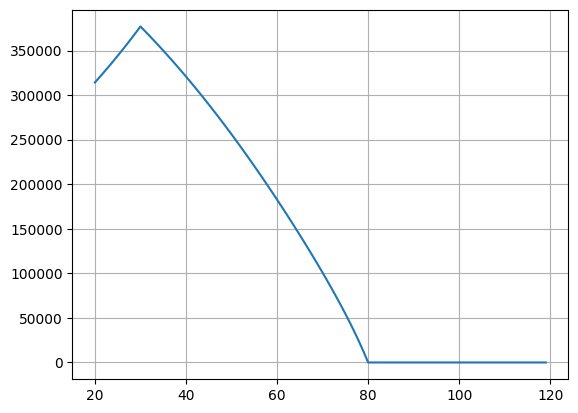

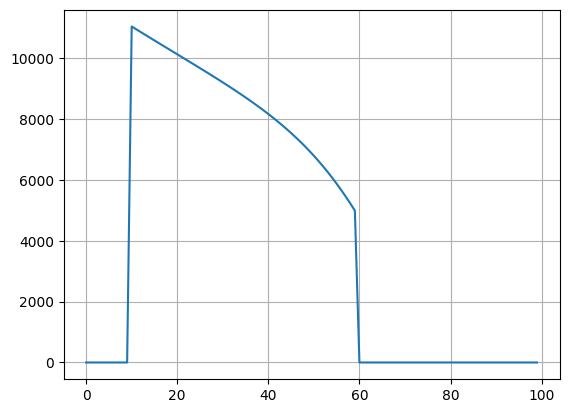

In [7]:
def main_t():
    a = TarEng()
    #a.ParseTask("G;iTech;g=0;x=20;s=110;fB=0;fM=1000000")
    #a.vPlot()

    #strTask = "A;iTech;g=0;x=55;b=60;s=90;fR=12000;alpha=0.05;iNrIncreases=10"
    #a.ParseTask(strTask)
    #a.vPlot()

    #strTask = "A2;iTech;g=0;g2=1;deltaxy=3;x=20;s=120;fR2=12000;fI=0.01"
    #a.ParseTask(strTask)
    #a.vPlot()

    strTask = "I;iTech;g=0;x=20;b=30;s=80;fR2=12000;fI=0.01;iState=6"
    a.ParseTask(strTask)
    a.vPlot()


main_t()